In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import wordcloud

In [100]:
df = pd.read_csv('C:/Users/zha/Downloads/postings.csv')

In [103]:
df.head()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,Data Engineer 2,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/data-engine...,2023-12-17,Bloomington,United States,Mid senior,Onsite,"Overview\nThe Data Engineer develops, implemen...","Azure, SQL, NoSQL, SQL Server, Oracle, MongoDB..."
1,Staff Data Engineer,Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/staff-data-...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"Python, Snowflake, Airflow, Kubernetes, Docker..."
2,"Senior Data Engineer, Public Company",Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-data...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"Python, SQL, Snowflake, Airflow, Kubernetes, D..."
3,"Senior Data Engineer, Public Company",Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-data...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"TDD, Automation, Continuous delivery, Data eng..."
4,"Senior Systems Engineer, Azure Data Platform",Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-syst...,2023-12-17,Bloomington,United States,Mid senior,Hybrid,Overview\nWe are seeking a talented Azure Clou...,NaN


In [104]:
from wordcloud import WordCloud, STOPWORDS

In [105]:
job_summary = ''
for i, row in df.iterrows():
    if isinstance(df.loc[i, 'job_summary'], str):
        job_summary = job_summary + df.loc[i, 'job_summary']

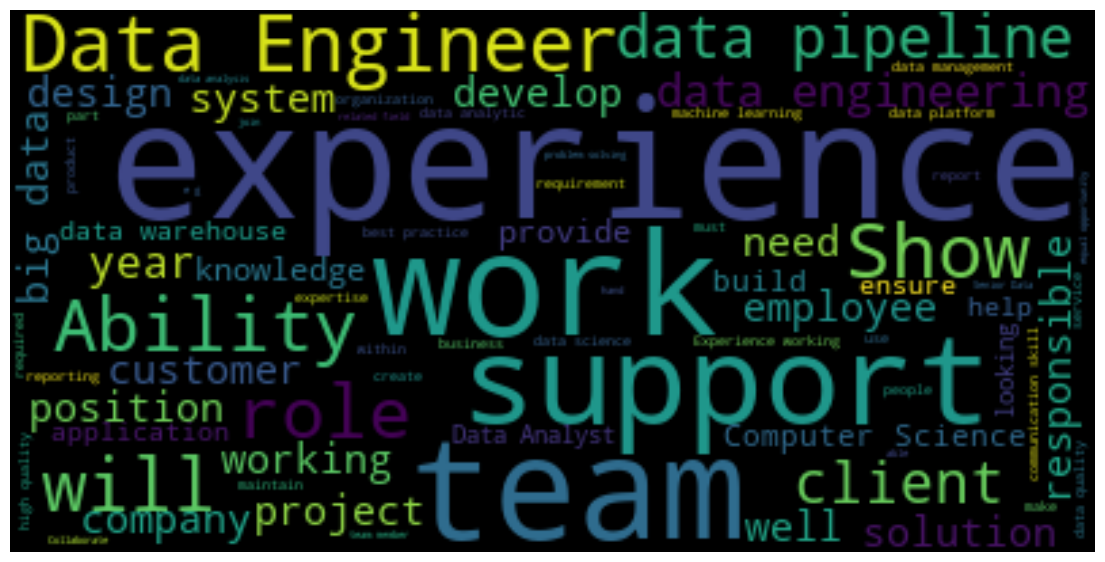

In [106]:
stopwords = set(STOPWORDS)
wc = WordCloud(stopwords = stopwords)
wc.generate(job_summary)
fig = plt.figure(figsize=(14, 18))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
job_skills = ''
for i, row in df.iterrows():
    if isinstance(df.loc[i, 'job_skills'], str):
        job_skills = job_skills + df.loc[i, 'job_skills']

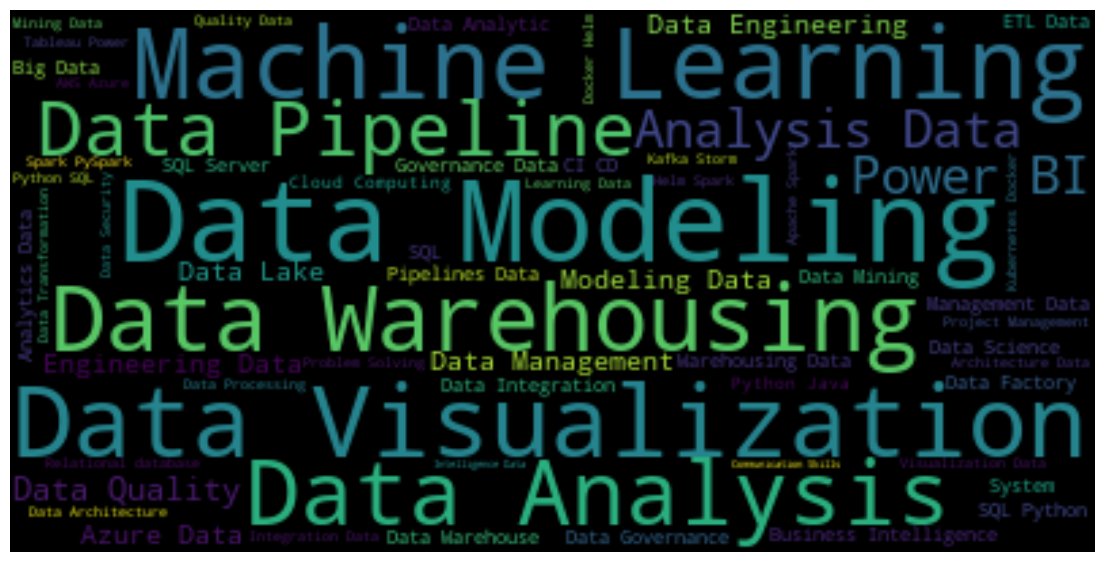

In [32]:
stopwords = set(STOPWORDS)
# stopwords = list(stopwords)+ ['work', 'Experience', 'provide', 'Must']
# stopwords.add('Data')
wc = WordCloud(stopwords = stopwords)
wc.generate(job_skills)
fig = plt.figure(figsize=(14, 18))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
df['job_type'].value_counts().rename_axis('job_type').reset_index(name='counts')

,job_type,counts
0,Onsite,2817
1,Hybrid,2061
2,Remote,1147


In [37]:
df_location = pd.DataFrame({'job_location':df['job_location'].value_counts().index.tolist(), 'count':df['job_location'].value_counts().values.tolist()})

In [42]:
state = []
cnt = []
for index, row in df_location.iterrows():
    location = row['job_location'].split(',')
    if len(location) == 2:
        state.append(location[1])
        cnt.append(row['count'])        
df_state = pd.DataFrame({'state':state, 'count':cnt})

In [88]:
df2 = df_state.groupby('state', as_index=False)['count'].sum()

In [89]:
mask = df2['state'].apply(lambda x: True if len(x.strip())==2 else False)
df3 = df2[mask]
df4 = df2[~mask]

In [91]:
df3['state'] = df3['state'].apply(lambda x: states_dic[x.strip()])

C:\Users\zha\AppData\Local\Temp\ipykernel_11044\2867014466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['state'] = df3['state'].apply(lambda x: states_dic[x.strip()])


In [93]:
df4

,state,count
3,Alabama Area,1
4,Australia,4
8,Canada,20
18,Illinois Metropolitan Area,2
30,Massachusetts Metropolitan Area,2
31,Mexico,1
43,Ohio Metropolitan Area,4
44,Oregon Metropolitan Area,3
49,South Carolina Metropolitan Area,2
52,Texas Metropolitan Area,2


In [94]:
df3.loc[0, 'count']=31
df3.loc[16, 'count'] = 241
df3.loc[22, 'count'] = 143
df3.loc[40, 'count'] = 145
df3.loc[42, 'count'] = 62
df3.loc[47, 'count'] = 14
df3.loc[51, 'count'] = 277

C:\Users\zha\.conda\envs\tf2\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
states_dic = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [96]:
us_geo = r'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [97]:
folium.Choropleth(
    geo_data=us_geo,
    data=df3,
    columns=['state', 'count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LinkedIn Post Job State',
    # reset=True
).add_to(world_map)

# display map
world_map